# Secure Data Disclosure on Kubernetes: Server Administration

#### This notebook showcases how a data owner could add and make their data available to certain user. We will do this in a step by step fashion.

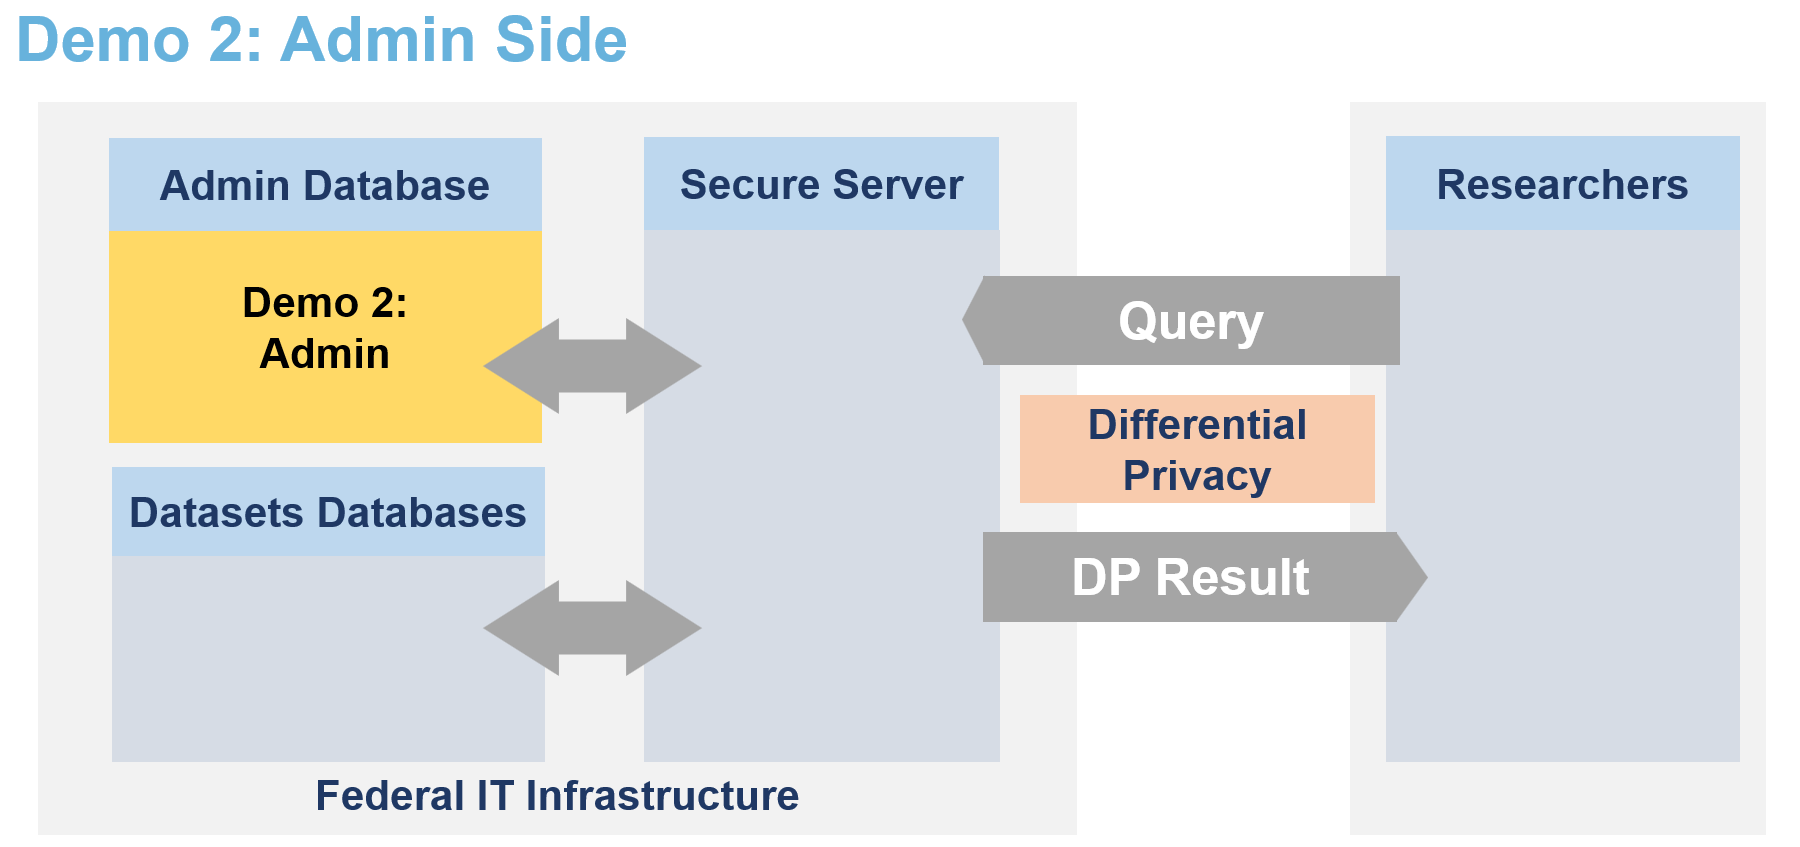

In [2]:
from IPython.display import Image
Image(filename="images/image_demo_admin_side.png", width=800)

# Start of DEMO

#### Since the service has been deployed in the demo 1, the URL should be accessible.

In [1]:
URL = 'https://lomas-server.lab.sspcloud.fr/'

## Administering the service by accessing the mongoDB

In [2]:
import os
os.chdir('../lomas_server/')

Let's add a formatting function to have more readable outputs.

In [3]:
from ast import literal_eval
import subprocess

def run(command, to_dict=False):
    command = f"python mongodb_admin.py {command}"
    completed_process = subprocess.run(command, shell=True, text=True, capture_output=True)
    output = completed_process.stdout
    if to_dict:
        return literal_eval(output)
    else:
        output = output.rstrip('\n').replace(r'\n', '\n')
        return print(output)

## **Preparing the database**

#### Some existing options

In [4]:
run("--help") # !python mongodb_admin.py --help

usage: MongoDB administration script for the user database [-h]
                                                           {add_user,add_user_with_budget,del_user,add_dataset_to_user,del_dataset_to_user,set_budget_field,set_may_query,show_user,create_users_collection,add_dataset,add_datasets,drop_collection,show_collection}
                                                           ...

options:
  -h, --help            show this help message and exit

subcommands:
  {add_user,add_user_with_budget,del_user,add_dataset_to_user,del_dataset_to_user,set_budget_field,set_may_query,show_user,create_users_collection,add_dataset,add_datasets,drop_collection,show_collection}
                        user database administration operations
    add_user            add user to users collection
    add_user_with_budget
                        add user with budget to users collection
    del_user            delete user from users collection
    add_dataset_to_user
                        add dataset w

#### Cleaning the database

In [5]:
run("drop_collection --collection datasets")  
run("drop_collection --collection metadata")
run("drop_collection --collection users")

Deleted collection datasets.
Deleted collection metadata.
Deleted collection users.


## **Datasets (add and drop)**

#### For each dataset, 2 informations are required:

#### - the type of database in which the dataset is stored
#### - a path to the metadata of the dataset (stored as a yaml file).

#### Metadata are expected to be in the same format as [SmartnoiseSQL dictionary format](https://docs.smartnoise.org/sql/metadata.html#dictionary-format), where among other, there is information about all the available columns, their type, bound values (see Smartnoise page for more details).

## Add one dataset

#### We can add **one dataset** with its name, database type and path to medata file:

In [6]:
run("add_dataset -d PENGUIN -db REMOTE_HTTP_DB -mp ../data/collections/metadata/penguin_metadata.yaml")

Added dataset PENGUIN with database REMOTE_HTTP_DB and metadata from ../data/collections/metadata/penguin_metadata.yaml.


### Add multiple datasets

In [7]:
run("add_datasets --path ../data/collections/dataset_collection.yaml -c")

Cleaning done. 
Added datasets collection from yaml at ../data/collections/dataset_collection.yaml. 
Added metadata of IRIS dataset. 
Added metadata of PENGUIN dataset. 
Added metadata of TITANIC dataset. 
Added metadata of FSO_INCOME_SYNTHETIC dataset. 


## **Users**

#### Adding users

In [8]:
run("add_user_with_budget --user 'Dr. Antartica' --dataset 'PENGUIN' --epsilon 10.0 --delta 0.001")

Added access to user Dr. Antartica with dataset PENGUIN, budget epsilon 10.0 and delta 0.001.


### And we can also modify existing the total budget of a user:

In [9]:
run("set_budget_field --user 'Dr. Antartica' --dataset 'PENGUIN' --field initial_epsilon --value 20.0")

Set budget of Dr. Antartica for dataset PENGUIN of initial_epsilon to 20.0.


### Finally, many users can actually be loaded directly from a single file

#### We add the data based on a yaml file:

In [10]:
run("create_users_collection --path ../data/collections/user_collection.yaml -c")

Cleaning done. 

Added user data from yaml at ../data/collections/user_collection.yaml.


### Archives of queries

In [11]:
run("show_collection --collection queries_archives")

[]


## **Stopping the service: Let's not do it right now!**

To tear down the service, we simply execute the command `helm uninstall lomas-service`

In [11]:
!helm uninstall lomas-service

release "sdd-service" uninstalled
